In [473]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [474]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [475]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [476]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [477]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [478]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [479]:
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


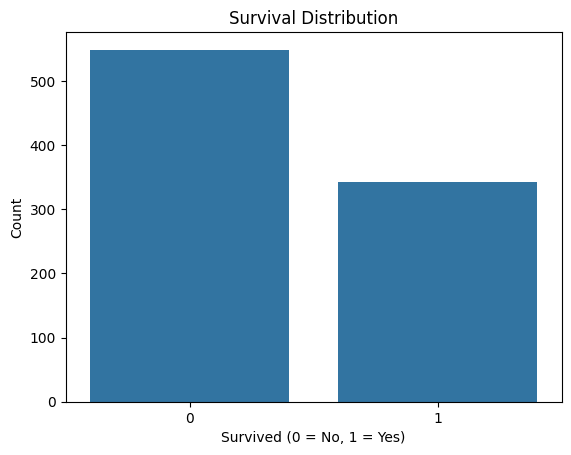

In [480]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

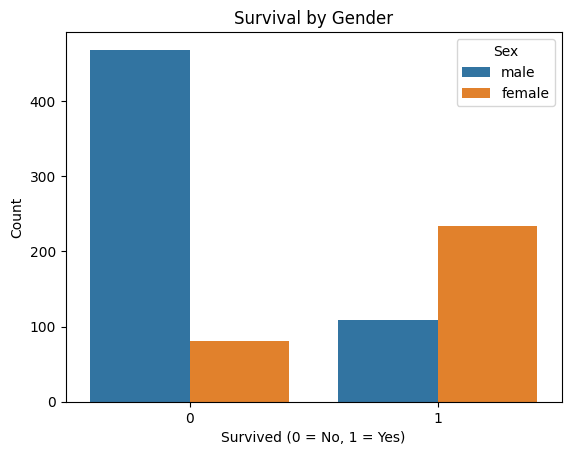

In [481]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

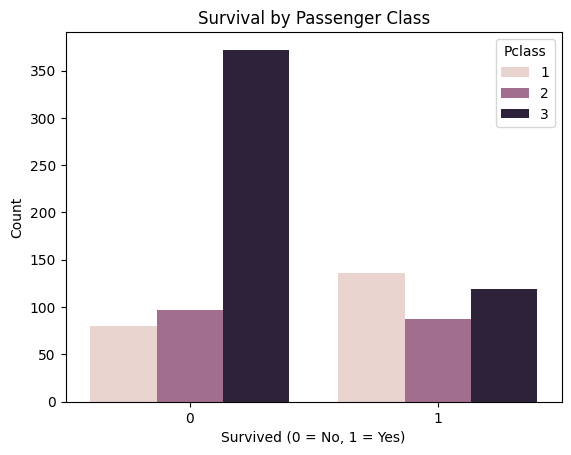

In [482]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

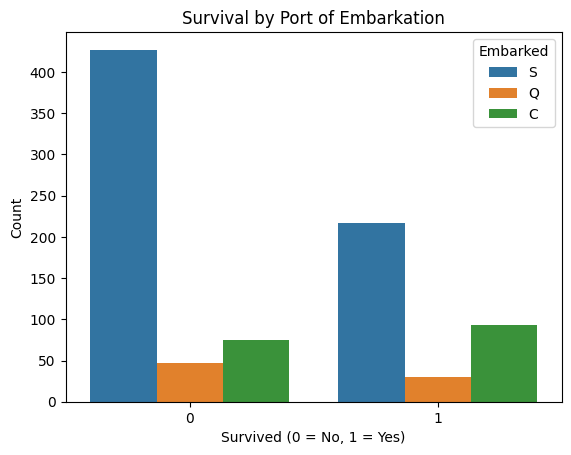

In [483]:
sns.countplot(x='Survived', hue='Embarked', data=train_df)
plt.title('Survival by Port of Embarkation')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

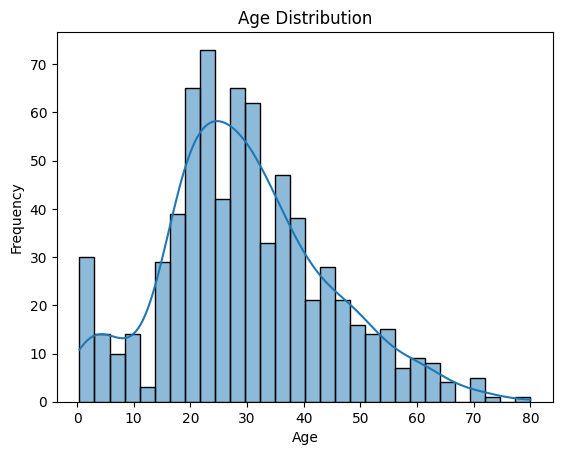

In [484]:
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

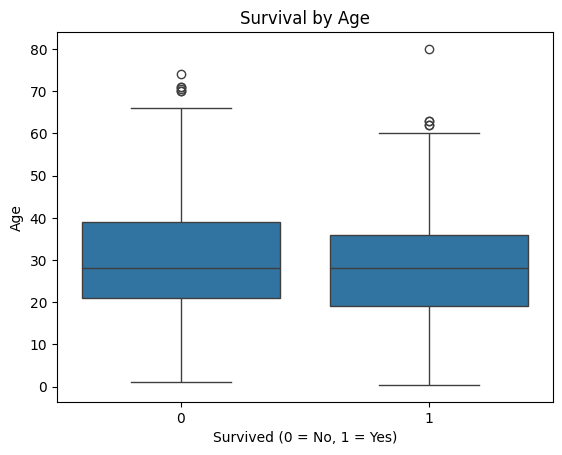

In [485]:
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Survival by Age')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

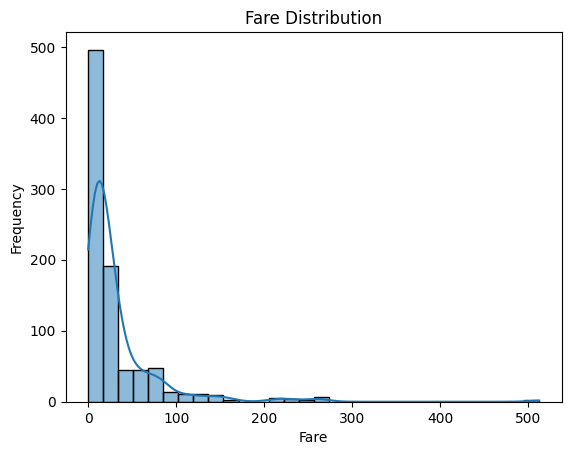

In [486]:
sns.histplot(train_df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

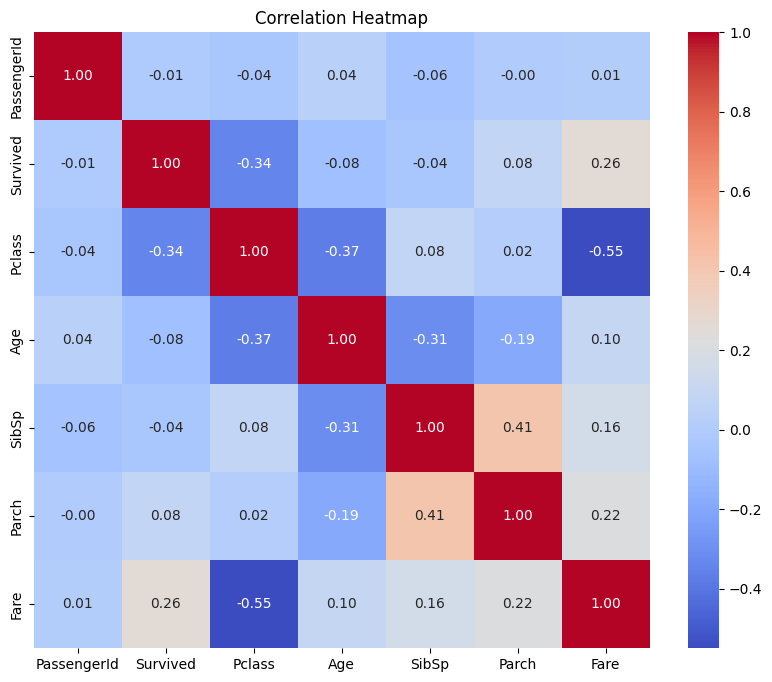

In [487]:
numerical_features = train_df.select_dtypes(include=['float64', 'int64'] )

corr = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


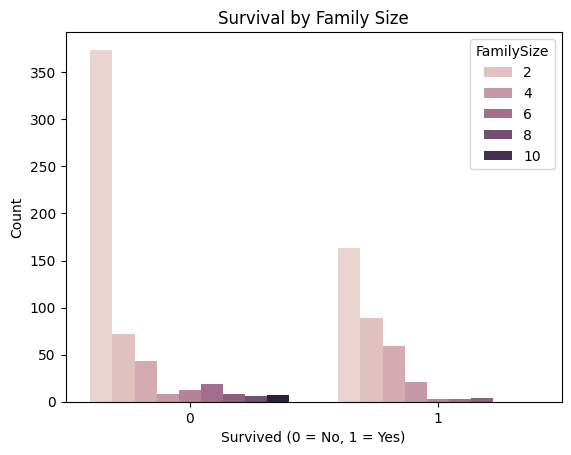

In [488]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

sns.countplot(x='Survived', hue='FamilySize', data=train_df)
plt.title('Survival by Family Size')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

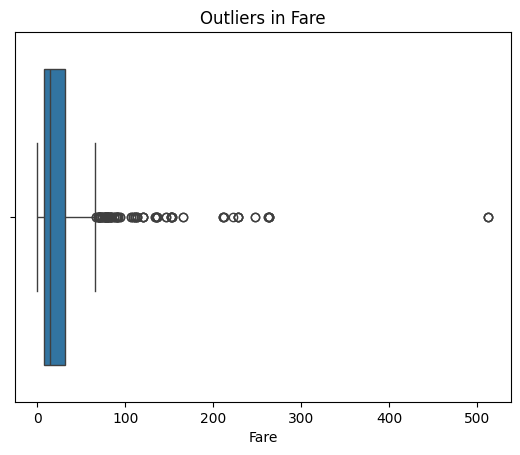

In [489]:
sns.boxplot(x=train_df['Fare'])
plt.title('Outliers in Fare')
plt.xlabel('Fare')
plt.show()

In [490]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64


In [491]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
dtype: int64


In [492]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [493]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64


In [494]:
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'U')
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'U')

In [495]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [496]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [497]:
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,9,3
top,"Braund, Mr. Owen Harris",male,347082,U,S
freq,1,577,7,687,646


In [498]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [499]:
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [500]:
test_df['Title'].describe()

count     418
unique      9
top        Mr
freq      240
Name: Title, dtype: object

In [501]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior'])
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior'])


In [502]:
train_df['FareGroup'] = pd.qcut(train_df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
test_df['FareGroup'] = pd.qcut(test_df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


In [503]:
train_df['FamilySizeGroup'] = pd.cut(train_df['FamilySize'], bins=[0, 1, 3, 5, 10], labels=['Single', 'Small', 'Medium', 'Large'])
test_df['FamilySizeGroup'] = pd.cut(test_df['FamilySize'], bins=[0, 1, 3, 5, 10], labels=['Single', 'Small', 'Medium', 'Large'])

In [504]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title',
       'AgeGroup', 'FareGroup', 'FamilySizeGroup'],
      dtype='object')

In [505]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))

In [506]:
train_df['TicketNumber']

0        521171
1         17599
2      23101282
3        113803
4        373450
         ...   
886      211536
887      112053
888        6607
889      111369
890      370376
Name: TicketNumber, Length: 891, dtype: object

In [507]:
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked,Title,TicketNumber
count,891,891,891,891,891,891,891
unique,891,2,681,9,3,17,679
top,"Braund, Mr. Owen Harris",male,347082,U,S,Mr,2343
freq,1,577,7,687,646,517,7


In [508]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title',
       'AgeGroup', 'FareGroup', 'FamilySizeGroup', 'TicketNumber'],
      dtype='object')

In [509]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeGroup,FareGroup,FamilySizeGroup,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,Mr,Adult,Low,Small,521171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Mrs,Adult,Very High,Small,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,Miss,Adult,Medium,Single,23101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Mrs,Adult,Very High,Small,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,Mr,Adult,Medium,Single,373450


In [510]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

In [511]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])

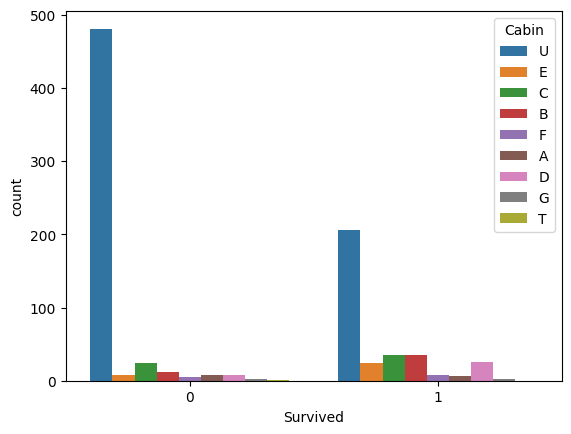

In [512]:
sns.countplot(x='Survived', hue=train_df['Cabin'] ,data=train_df)
plt.show()

In [513]:
train_df['HasCabin'] = train_df['Cabin'].apply(lambda x: 0 if x == 'U' else 1)
test_df['HasCabin'] = test_df['Cabin'].apply(lambda x: 0 if x == 'U' else 1)

In [514]:
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

<Axes: xlabel='Survived', ylabel='count'>

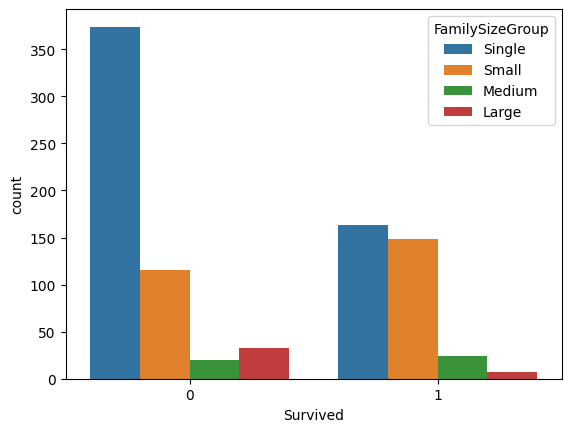

In [515]:
sns.countplot(x='Survived', hue='FamilySizeGroup',data=train_df)

In [516]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeGroup,FareGroup,FamilySizeGroup,TicketNumber,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.592481,1,0,A/5 21171,-0.502445,U,2,2,Mr,Adult,Low,Small,521171,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638789,1,0,PC 17599,0.786845,C,0,2,Mrs,Adult,Very High,Small,17599,1
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.284663,0,0,STON/O2. 3101282,-0.488854,U,2,1,Miss,Adult,Medium,Single,23101282,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407926,1,0,113803,0.420730,C,2,2,Mrs,Adult,Very High,Small,113803,1
4,5,0,3,"Allen, Mr. William Henry",0,0.407926,0,0,373450,-0.486337,U,2,1,Mr,Adult,Medium,Single,373450,0


In [517]:
train_df = pd.get_dummies(train_df, columns=['FamilySizeGroup'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['FamilySizeGroup'], drop_first=True)

In [518]:
train_df[['FamilySizeGroup_Small', 'FamilySizeGroup_Medium', 'FamilySizeGroup_Large']] = train_df[['FamilySizeGroup_Small', 'FamilySizeGroup_Medium', 'FamilySizeGroup_Large']].astype(int)
test_df[['FamilySizeGroup_Small', 'FamilySizeGroup_Medium', 'FamilySizeGroup_Large']] = test_df[['FamilySizeGroup_Small', 'FamilySizeGroup_Medium', 'FamilySizeGroup_Large']].astype(int)

In [519]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [520]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [521]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
    'Dona': 'Noble'
})

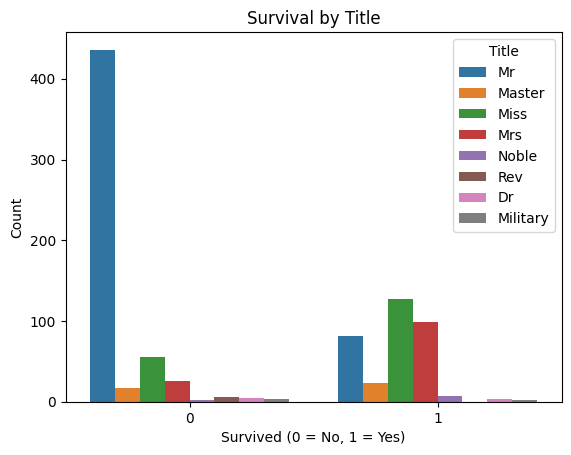

In [522]:
sns.countplot(x='Survived', hue='Title', data=train_df)
plt.title('Survival by Title')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [523]:
train_df['Title'] = train_df['Title'].replace({
    'Noble': 'Rare',
    'Rev': 'Rare',
    'Dr': 'Rare',
    'Military': 'Rare'
})

test_df['Title'] = test_df['Title'].replace({
    'Noble': 'Rare',
    'Rev': 'Rare',
    'Dr': 'Rare',
    'Military': 'Rare'
})


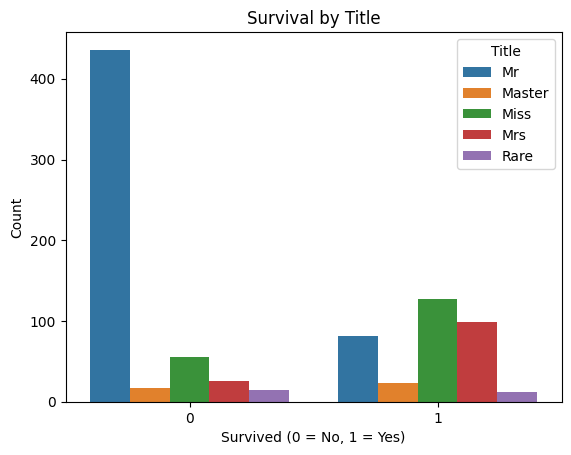

In [524]:
sns.countplot(x='Survived', hue='Title', data=train_df)
plt.title('Survival by Title')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [525]:
train_df = pd.get_dummies(train_df, columns=['Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Title'], drop_first=True)

In [526]:
train_df[['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']] = train_df[['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']].astype(int)
test_df[['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']] = test_df[['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']].astype(int)

In [527]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FareGroup,TicketNumber,HasCabin,FamilySizeGroup_Small,FamilySizeGroup_Medium,FamilySizeGroup_Large,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.592481,1,0,A/5 21171,-0.502445,...,Low,521171,0,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638789,1,0,PC 17599,0.786845,...,Very High,17599,1,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.284663,0,0,STON/O2. 3101282,-0.488854,...,Medium,23101282,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407926,1,0,113803,0.420730,...,Very High,113803,1,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,0.407926,0,0,373450,-0.486337,...,Medium,373450,0,0,0,0,0,1,0,0


/tmp/ipykernel_257608/3188816893.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('AgeGroup')['Survived'].mean().plot(kind='bar')


<Axes: xlabel='AgeGroup'>

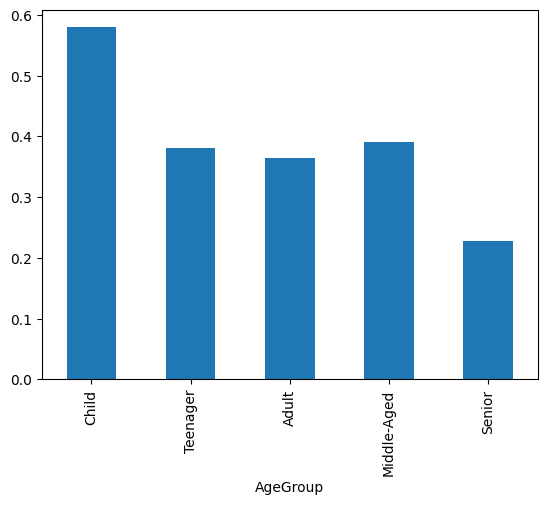

In [528]:
train_df.groupby('AgeGroup')['Survived'].mean().plot(kind='bar')

In [529]:
train_df = pd.get_dummies(train_df, columns=['AgeGroup'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['AgeGroup'], drop_first=True)
train_df[['AgeGroup_Teenager', 'AgeGroup_Adult', 'AgeGroup_Middle-Aged', 'AgeGroup_Senior']] = train_df[['AgeGroup_Teenager', 'AgeGroup_Adult', 'AgeGroup_Middle-Aged', 'AgeGroup_Senior']].astype(int)
test_df[['AgeGroup_Teenager', 'AgeGroup_Adult', 'AgeGroup_Middle-Aged', 'AgeGroup_Senior']] = test_df[['AgeGroup_Teenager', 'AgeGroup_Adult', 'AgeGroup_Middle-Aged', 'AgeGroup_Senior']].astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySizeGroup_Medium,FamilySizeGroup_Large,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teenager,AgeGroup_Adult,AgeGroup_Middle-Aged,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.592481,1,0,A/5 21171,-0.502445,...,0,0,0,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638789,1,0,PC 17599,0.786845,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.284663,0,0,STON/O2. 3101282,-0.488854,...,0,0,1,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407926,1,0,113803,0.420730,...,0,0,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0.407926,0,0,373450,-0.486337,...,0,0,0,1,0,0,0,1,0,0


In [530]:
fare_group_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High': 3
}
train_df['FareGroup'] = train_df['FareGroup'].map(fare_group_mapping)
test_df['FareGroup'] = test_df['FareGroup'].map(fare_group_mapping)

In [531]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'FareGroup', 'TicketNumber', 'HasCabin', 'FamilySizeGroup_Small',
       'FamilySizeGroup_Medium', 'FamilySizeGroup_Large', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Teenager',
       'AgeGroup_Adult', 'AgeGroup_Middle-Aged', 'AgeGroup_Senior'],
      dtype='object')

In [532]:
X = train_df.drop(['PassengerId', 'Survived', 'Age', 'Fare', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'TicketNumber'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['PassengerId', 'Name', 'Age', 'Fare', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'TicketNumber'], axis=1)

In [533]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [534]:
from sklearn.linear_model import LogisticRegression

modelLogReg = LogisticRegression()
modelLogReg.fit(X_train, y_train)

y_pred = modelLogReg.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred)}')

Validation Accuracy: 0.8268156424581006


Validation Accuracy is ~82%


In [535]:
from sklearn.neighbors import KNeighborsClassifier

modelKNeighClass = KNeighborsClassifier(n_neighbors=5)
modelKNeighClass.fit(X_train, y_train)

y_pred = modelKNeighClass.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred)}')

Validation Accuracy: 0.8156424581005587


Validation Accuracy is ~81%

In [536]:
from sklearn.tree import DecisionTreeClassifier

modelDecTreeClass = DecisionTreeClassifier()
modelDecTreeClass.fit(X_train, y_train)

y_pred = modelDecTreeClass.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred)}')

Validation Accuracy: 0.8100558659217877


Validation Accuracy is ~81%

In [537]:
from sklearn.ensemble import RandomForestClassifier

modelRandForClass = RandomForestClassifier(random_state=42)
modelRandForClass.fit(X_train, y_train)

y_pred = modelRandForClass.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8268156424581006


Validation Accuracy is ~82%